In [5]:
import numpy as np

from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits as fits

from skimage import data, color, img_as_float
from skimage.transform import resize

import glob
import os

In [6]:
path = '/media/aleksandra/Data/DeepMerge/HackDTU/SB00_subdir_022/subdir_022/'
path_save = '/media/aleksandra/Data/DeepMerge/HackDTU/resized_SB00/res_subdir_022/'

for subdir, dirs, files in os.walk(path):
    for file in files:
        root, ext = os.path.splitext(file)
        image_data = fits.getdata(os.path.join(subdir,file))
        image_small = resize(image_data, (64,64), order=3, mode='symmetric', preserve_range=True)
        np.save(os.path.join(path_save,'res_'+root), image_small)

In [11]:
image_data = fits.getdata('snap068dir014sh128420cam00_WFC3-F160W_SB00.fits')
image_data1 = fits.getdata('snap068dir018sh152207cam01_ACS-F814W_SB00.fits')

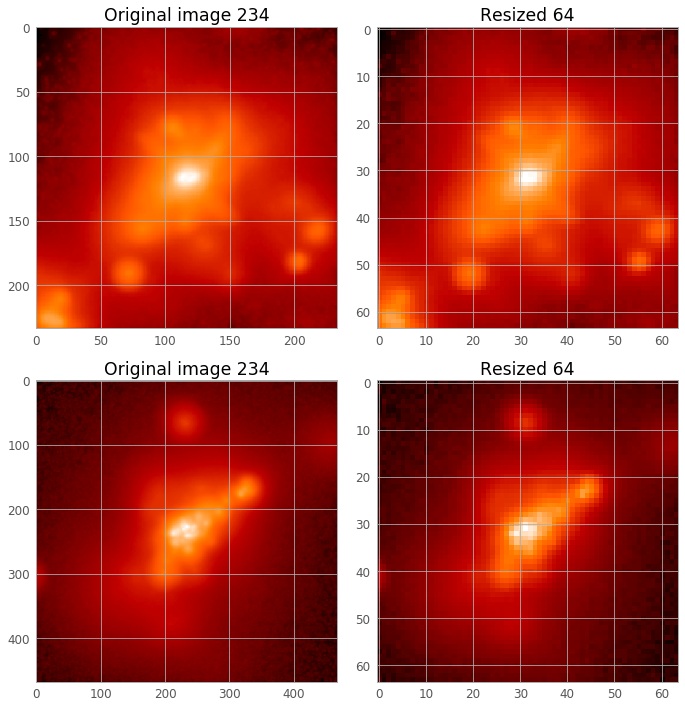

In [20]:
image_resized = resize(image_data, (64,64), order=3, mode='symmetric', preserve_range=True)
image_resized1 = resize(image_data1, (64,64), order=3, mode='symmetric', preserve_range=True)


fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

ax = axes.ravel()

ax[0].imshow(image_data,  norm=LogNorm())
ax[0].set_title("Original image 234")

ax[1].imshow(image_resized,  norm=LogNorm())
ax[1].set_title("Resized 64")


ax[2].imshow(image_data1,  norm=LogNorm())
ax[2].set_title("Original image 234")

ax[3].imshow(image_resized1,  norm=LogNorm())
ax[3].set_title("Resized 64")


plt.tight_layout()
plt.show()
fig.savefig('resize.jpg')

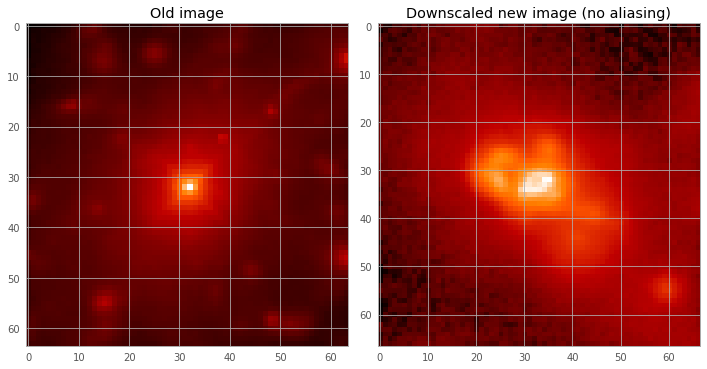

In [207]:
image_file_old = get_pkg_data_filename('rebin_snap068dir000sh0cam00_WFC3-F105W_SB00.fits')
image_data_old = fits.getdata(image_file_old)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,10))

ax = axes.ravel()

ax[0].imshow(image_data_old,  norm=LogNorm())
ax[0].set_title("Old image")

ax[1].imshow(image_downscaled1,  norm=LogNorm())
ax[1].set_title("Downscaled new image (no aliasing)")


plt.tight_layout()
plt.show()
fig.savefig('old_vs_new.jpg')

In [115]:
X1 = np.load('res_snap068dir000sh0cam00_ACS-F435W_SB00.npy')
X2 = np.load('res_snap068dir000sh0cam00_ACS-F814W_SB00.npy')
X3 = np.load('res_snap068dir000sh0cam00_NC-F356W_SB00.npy')
X4 = np.load('res_snap068dir000sh0cam00_WFC3-F160W_SB00.npy')

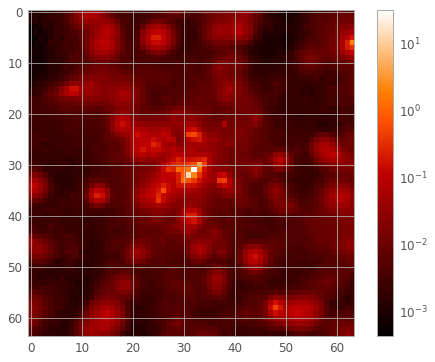

In [110]:
plt.imshow(X1, norm=LogNorm())
plt.colorbar()